## CIFAR 10

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from pathlib import Path

if os.name == 'nt':
    PATH = str(Path.home()) + "\\data\\cifar10\\"
else:
    PATH = "data/cifar10/"
os.makedirs(PATH, exist_ok=True)

In [3]:
def moveFilesToSubDirsFromFileName(path):
    files = os.listdir(path)
    for f in files:
        if os.path.isdir(os.path.join(path, f)):
            continue
        filename, file_extension = os.path.splitext(f)
        regex = re.compile('[^a-zA-Z]')        
        file_label = regex.sub('', filename)
        target_folder = os.path.join(path, file_label)
        if not os.path.exists(target_folder): os.makedirs(target_folder)
        os.rename(os.path.join(path, f), os.path.join(target_folder, f))
    
moveFilesToSubDirsFromFileName(os.path.join(PATH, "train"))
moveFilesToSubDirsFromFileName(os.path.join(PATH, "test"))

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [5]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlipXY()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [6]:
bs=128

### Look at data

In [7]:
data = get_data(32,4)

In [8]:
x,y=next(iter(data.trn_dl))

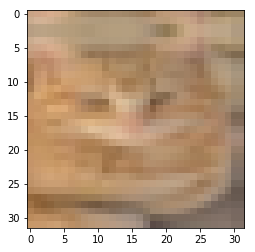

In [9]:
plt.imshow(data.trn_ds.denorm(x)[0]);

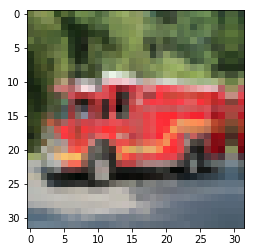

In [10]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Initial model

In [11]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [12]:
data = get_data(8,bs*4)

In [13]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [14]:
lr=1e-2; wd=5e-4

In [15]:
%time learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[  0.00000e+00   3.28551e+00   1.45881e+08   9.78520e-02]                                                              

Wall time: 46.9 s


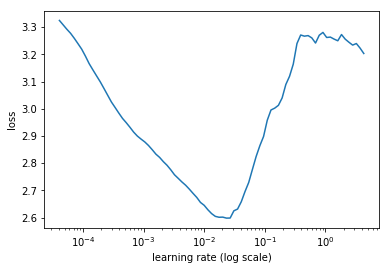

In [16]:
learn.sched.plot()

In [17]:
%time learn.fit(lr, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       1.83625  1.54167  0.44647]                                                                                  

Wall time: 46 s


In [18]:
%time learn.fit(lr, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       1.48195  1.41538  0.49264]                                                                                  
[ 1.       1.41305  1.37117  0.51282]                                                                                  

Wall time: 1min 32s


In [19]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       1.35031  1.3387   0.51778]                                                                                  
[ 1.       1.34512  1.33738  0.52333]                                                                                  
[ 2.       1.22317  1.2631   0.54858]                                                                                  
[ 3.       1.28425  1.31803  0.52937]                                                                                  
[ 4.       1.20237  1.25705  0.55182]                                                                                  
[ 5.       1.08517  1.19626  0.57468]                                                                                  
[ 6.       0.99912  1.19118  0.57578]                                                                                  

Wall time: 5min 21s


In [20]:
learn.save('8x8_8')

## 16x16

In [21]:
learn.load('8x8_8')

In [22]:
learn.set_data(get_data(16,bs*2))

In [23]:
%time learn.fit(1e-3, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       1.5924   1.48314  0.46563]                                                                                  

Wall time: 28.1 s


In [24]:
learn.unfreeze()

In [25]:
%time learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[  0.00000e+00   2.54433e+00   1.20973e+08   9.76560e-02]                                                              

Wall time: 1min 19s


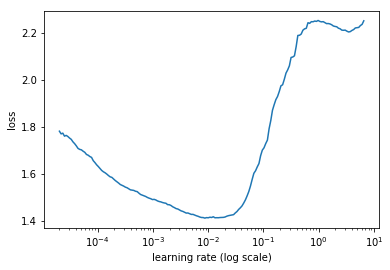

In [26]:
learn.sched.plot()

In [27]:
lr=1e-2

In [28]:
%time learn.fit(lr, 2, cycle_len=1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       1.29063  1.17998  0.57568]                                                                                  
[ 1.       1.09497  1.02927  0.63438]                                                                                  

Wall time: 2min 37s


In [29]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.98494  0.93376  0.66455]                                                                                  
[ 1.       0.97358  0.90192  0.67617]                                                                                  
[ 2.       0.78577  0.78505  0.72481]                                                                                  
[ 3.       0.86508  0.91675  0.68271]                                                                                  
[ 4.       0.74913  0.72256  0.74531]                                                                                  
[ 5.       0.62447  0.65704  0.76943]                                                                                  
[ 6.       0.56168  0.6427   0.7791 ]                                                                                  

Wall time: 9min 19s


In [30]:
learn.save('16x16_8')

## 24x24

In [31]:
learn.load('16x16_8')

In [32]:
learn.set_data(get_data(24,bs))

In [33]:
%time learn.fit(1e-2, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.78971  0.82978  0.73952]                                                                                  

Wall time: 1min 1s


In [34]:
learn.unfreeze()

In [35]:
%time learn.fit(lr, 1, cycle_len=1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.61217  0.5803   0.80014]                                                                                  

Wall time: 2min 58s


In [36]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.52784  0.51896  0.82516]                                                                                  
[ 1.       0.57187  0.53037  0.82338]                                                                                  
[ 2.       0.40858  0.43736  0.85315]                                                                                  
[ 3.       0.54144  0.61558  0.80083]                                                                                  
[ 4.       0.40716  0.48822  0.83604]                                                                                  
[ 5.       0.29678  0.37963  0.87411]                                                                                  
[ 6.       0.24011  0.35962  0.88084]                                                                                  

Wall time: 20min 4s


In [37]:
learn.save('24x24_8')

In [39]:
%time log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)
metrics.log_loss(y,preds), accuracy(preds,y)

Wall time: 45.7 s                                                                                                      


(0.33887534339040359, 0.88649999999999995)

## 32x32

In [40]:
learn.load('24x24_8')

In [41]:
learn.set_data(get_data(32,bs))

In [42]:
%time learn.fit(1e-2, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.29851  0.38044  0.86936]                                                                                  

Wall time: 1min 35s


In [43]:
learn.unfreeze()

In [44]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.29739  0.32835  0.88954]                                                                                  
[ 1.       0.34511  0.37955  0.87253]                                                                                  
[ 2.       0.2171   0.29347  0.89943]                                                                                  
[ 3.       0.33382  0.47698  0.84009]                                                                                  
[ 4.       0.24769  0.39366  0.87322]                                                                                  
[ 5.       0.15596  0.27381  0.90991]                                                                                  
[ 6.       0.11676  0.26114  0.91416]                                                                                  

Wall time: 30min 20s


In [45]:
%time learn.fit(lr, 3, cycle_len=4, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=12), HTML(value='')))

[ 0.       0.27459  0.42698  0.8658 ]                                                                                  
[ 1.       0.19681  0.35204  0.88904]                                                                                  
[ 2.       0.11491  0.26299  0.91169]                                                                                  
[ 3.       0.08537  0.24711  0.91861]                                                                                  
[ 4.       0.24266  0.41298  0.87342]                                                                                  
[ 5.       0.15373  0.29901  0.90536]                                                                                  
[ 6.       0.08205  0.24996  0.9197 ]                                                                                  
[ 7.       0.0629   0.24226  0.92267]                                                                                  
[ 8.       0.1853   0.40332  0.8843 ]   

In [47]:
%time log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)
metrics.log_loss(y,preds), accuracy(preds,y)

Wall time: 1min 17s                                                                                                    


(0.20908895040810857, 0.92989999999999995)

In [48]:
learn.save('32x32_8')